<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Carlos Daniel Pérez Hernández

**Fecha:** 07 de mayo del 2021.

**Expediente** : if722627
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 11: Clase: 32

## Valuación opciones Tipo Barrera

> Utilizar lo visto en la **Clase24_Valuación Opciones Barrera** para realizar valuación de opciones

# <font color = 'red'> Tarea: </font>
Realizar la valuación de las opciones barrera para las acciones de Microsoft, siguiendo los siguientes lineamientos:
1. Realizar la valuación para el tipo de opción barrera 'CALL'- down-and-out, usando la suposición de rendimientos normales y usando el método del histograma. Para ambas valuaciones, comparar los resultados de la evaluación obtenida con los resultados obtenidos por la valuación Europea. Como se realizó en clase.
2. Repetir el inciso anterior pero en esta ocasión para el caso de 'PUT'- Up-and-out.

**Nota:** Analice los datos descargados y según el método ya sea `down-and-out` o `Up-and-out` defina un strike price usando la volatility smile vista en la clase de opciones europeas y basado en el spot price y el strike defina una barrera adecuada.

#### ``Carlos Daniel Pérez Hernández``

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.neighbors import KernelDensity
import datetime
from datetime import datetime, timedelta
import scipy.stats as st
import scipy as sp
import scipy.optimize as optimize
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
%matplotlib inline

In [2]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

####### Calculation of log-returns
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).dropna()

## 'CALL'- down-and-out

In [3]:
closes = get_adj_closes(['MSFT'], '2017-01-01')
closes_MSFT = closes.loc[:,'MSFT']
closes_MSFT

Date
2017-01-03     58.538418
2017-01-04     58.276497
2017-01-05     58.276497
2017-01-06     58.781628
2017-01-09     58.594547
                 ...    
2021-05-03    251.860001
2021-05-04    247.789993
2021-05-05    246.470001
2021-05-06    249.729996
2021-05-07    252.460007
Name: MSFT, Length: 1094, dtype: float64

In [4]:
ret_MSFT = calc_daily_ret(closes_MSFT)

sigma = ret_MSFT.std()
r = (0.05/100)/360
sigma, r

(0.01797312595647632, 1.388888888888889e-06)

In [5]:
MSFT = web.YahooOptions('MSFT')
MSFT_opt = MSFT.get_all_data().reset_index()
MSFT_opt.set_index('Expiry').sort_index()

MSFT_opt.loc[MSFT_opt.Expiry.apply(lambda x: (x.year == 2022) and (x.month == 6))]

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
16,80.0,2022-06-17,call,MSFT220617C00080000,178.22,171.85,172.95,0.000000,0.000000,3.0,85.0,0.517095,MSFT,False,MSFT,252.46,2021-05-07 20:00:02,2021-04-13 17:46:55,"{'contractSymbol': 'MSFT220617C00080000', 'str..."
17,80.0,2022-06-17,put,MSFT220617P00080000,0.48,0.39,0.54,-0.010000,-2.040820,3.0,1756.0,0.514653,MSFT,False,MSFT,252.46,2021-05-07 20:00:02,2021-05-07 19:12:56,"{'contractSymbol': 'MSFT220617P00080000', 'str..."
26,85.0,2022-06-17,call,MSFT220617C00085000,104.29,0.00,0.00,0.000000,0.000000,3.0,3.0,0.000010,MSFT,False,MSFT,252.46,2021-05-07 20:00:02,2020-07-09 20:58:18,"{'contractSymbol': 'MSFT220617C00085000', 'str..."
27,85.0,2022-06-17,put,MSFT220617P00085000,0.55,0.46,0.62,0.000000,0.000000,50.0,629.0,0.500005,MSFT,False,MSFT,252.46,2021-05-07 20:00:02,2021-05-03 13:49:43,"{'contractSymbol': 'MSFT220617P00085000', 'str..."
36,90.0,2022-06-17,call,MSFT220617C00090000,162.80,161.85,162.90,0.000000,0.000000,2.0,4.0,0.459478,MSFT,False,MSFT,252.46,2021-05-07 20:00:02,2021-05-03 15:11:00,"{'contractSymbol': 'MSFT220617C00090000', 'str..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,365.0,2022-06-17,put,MSFT220617P00365000,114.08,115.15,116.10,-7.139999,-5.890117,150.0,171.0,0.263038,MSFT,False,MSFT,252.46,2021-05-07 20:00:02,2021-05-07 15:18:59,"{'contractSymbol': 'MSFT220617P00365000', 'str..."
1818,370.0,2022-06-17,call,MSFT220617C00370000,2.41,2.36,2.70,0.000000,0.000000,1.0,169.0,0.251228,MSFT,False,MSFT,252.46,2021-05-07 20:00:02,2021-05-05 17:59:45,"{'contractSymbol': 'MSFT220617C00370000', 'str..."
1832,375.0,2022-06-17,call,MSFT220617C00375000,2.54,2.16,2.49,-0.910000,-26.376814,10.0,101.0,0.252754,MSFT,False,MSFT,252.46,2021-05-07 20:00:02,2021-05-07 15:12:13,"{'contractSymbol': 'MSFT220617C00375000', 'str..."
1851,380.0,2022-06-17,call,MSFT220617C00380000,2.50,1.98,2.29,0.000000,0.000000,3.0,225.0,0.254036,MSFT,False,MSFT,252.46,2021-05-07 20:00:02,2021-04-28 15:42:01,"{'contractSymbol': 'MSFT220617C00380000', 'str..."


### Volatility Smile

In [6]:
call = MSFT_opt.loc[(MSFT_opt.Expiry== '2022-06-17') & (MSFT_opt.Type=='call')]

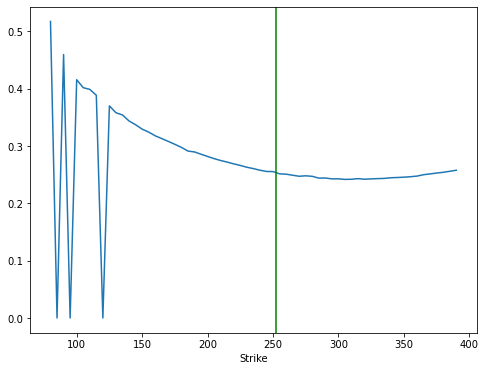

In [7]:
ax = call.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6)) # IV es implied volatility
ax.axvline(call.Underlying_Price.iloc[0], color='g'); # strike price del activo subyacente

Utilizando el voilatility Smile, podemos determinar que el strike price será de 251.

In [8]:
opt_deseada = MSFT_opt.loc[(MSFT_opt.Type=='call') & (MSFT_opt.Strike==250) & (MSFT_opt.Expiry=='2022-06-17')]
opt_deseada

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
1048,250.0,2022-06-17,call,MSFT220617C00250000,27.83,27.5,28.2,2.83,11.32,32.0,2251.0,0.255318,MSFT,False,MSFT,252.46,2021-05-07 20:00:02,2021-05-07 19:41:42,"{'contractSymbol': 'MSFT220617C00250000', 'str..."


In [9]:
opt_valuar = opt_deseada.loc[list(opt_deseada.index)[0]]
opt_valuar

Strike                                                            250
Expiry                                            2022-06-17 00:00:00
Type                                                             call
Symbol                                            MSFT220617C00250000
Last                                                            27.83
Bid                                                              27.5
Ask                                                              28.2
Chg                                                              2.83
PctChg                                                          11.32
Vol                                                                32
Open_Int                                                         2251
IV                                                           0.255318
Root                                                             MSFT
IsNonstandard                                                   False
Underlying          

In [10]:
opt_valuar['JSON']

{'contractSymbol': 'MSFT220617C00250000',
 'strike': 250.0,
 'currency': 'USD',
 'lastPrice': 27.83,
 'change': 2.83,
 'percentChange': 11.32,
 'volume': 32,
 'openInterest': 2251,
 'bid': 27.5,
 'ask': 28.2,
 'contractSize': 'REGULAR',
 'expiration': 1655424000,
 'lastTradeDate': 1620416502,
 'impliedVolatility': 0.2553175054931641,
 'inTheMoney': True}

In [11]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start = today, end = expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = 251

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())

In [12]:
K, S0

(250.0, 251)

In [13]:
pd.set_option('display.max_columns', 15)

# Precio barrera
B = 200

# Si en algún momento el precio toca la barrera la opción se desactiva
I = (sim_closes > B).cumprod(axis=0) > 0
I

,0,1,2,3,4,5,6,...,9993,9994,9995,9996,9997,9998,9999
2021-05-07,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
2021-05-10,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
2021-05-11,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
2021-05-12,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
2021-05-13,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-13,False,True,True,True,False,True,False,...,True,False,True,False,False,True,True
2022-06-14,False,True,True,True,False,True,False,...,False,False,True,False,False,True,True
2022-06-15,False,True,True,True,False,True,False,...,False,False,True,False,False,True,True
2022-06-16,False,True,True,True,False,True,False,...,False,False,True,False,False,True,True


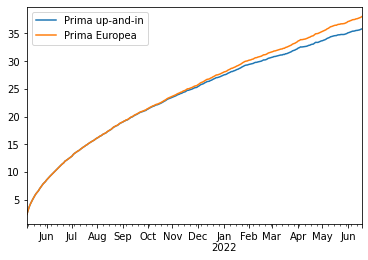

In [14]:
# Definir strike
strike = K
# Calcular la prima de una opción Europea
call = pd.DataFrame({'Prima Europea':np.exp(-r*ndays)*np.fmax(sim_closes - strike, 0)
                     .mean(axis=1)},index=dates)
# Calcular la prima de una opción barrera
callui = pd.DataFrame({'Prima up-and-in':np.exp(-r*ndays)*(I * np.fmax(sim_closes - strike, 0))
                       .mean(axis=1)},index=dates)
# Graficar el resultado de las dos primas previamente valuadas
ax = callui.plot();
call.plot(ax=ax);

In [15]:
call.iloc[-1]

Prima Europea    38.043929
Name: 2022-06-17 00:00:00, dtype: float64

In [16]:
callui.iloc[-1]

Prima up-and-in    35.823968
Name: 2022-06-17 00:00:00, dtype: float64

### CONCLUSION

En caso de que no toque la barrera, como es una opción de tipo call, tendríamos la opción de comprar esa opción, pero si es que llega a tocar la barrera entonces perdemos esa opción y la prima, que se calculó de 35.82. 

## 'PUT'- Up-and-out

In [17]:
MSFT = web.YahooOptions('MSFT')
MSFT_opt = MSFT.get_all_data().reset_index()
MSFT_opt.set_index('Expiry').sort_index()

MSFT_opt.loc[MSFT_opt.Expiry.apply(lambda x: (x.year == 2023) and (x.month == 6))]

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,...,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
115,115.0,2023-06-16,call,MSFT230616C00115000,138.00,136.00,140.50,...,MSFT,False,MSFT,252.46,2021-05-07 20:00:02,2021-05-06 13:42:40,"{'contractSymbol': 'MSFT230616C00115000', 'str..."
116,115.0,2023-06-16,put,MSFT230616P00115000,2.97,2.27,3.10,...,MSFT,False,MSFT,252.46,2021-05-07 20:00:02,2021-05-04 18:51:52,"{'contractSymbol': 'MSFT230616P00115000', 'str..."
142,120.0,2023-06-16,call,MSFT230616C00120000,127.00,131.10,136.00,...,MSFT,False,MSFT,252.46,2021-05-07 20:00:02,2021-05-04 16:28:40,"{'contractSymbol': 'MSFT230616C00120000', 'str..."
143,120.0,2023-06-16,put,MSFT230616P00120000,3.00,2.47,4.95,...,MSFT,False,MSFT,252.46,2021-05-07 20:00:02,2021-04-21 14:36:50,"{'contractSymbol': 'MSFT230616P00120000', 'str..."
169,125.0,2023-06-16,call,MSFT230616C00125000,125.00,126.55,131.00,...,MSFT,False,MSFT,252.46,2021-05-07 20:00:02,2021-05-05 15:09:02,"{'contractSymbol': 'MSFT230616C00125000', 'str..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,375.0,2023-06-16,put,MSFT230616P00375000,135.24,127.00,131.50,...,MSFT,False,MSFT,252.46,2021-05-07 20:00:02,2021-05-04 15:26:25,"{'contractSymbol': 'MSFT230616P00375000', 'str..."
1858,380.0,2023-06-16,call,MSFT230616C00380000,7.37,4.90,9.00,...,MSFT,False,MSFT,252.46,2021-05-07 20:00:02,2021-05-07 16:04:29,"{'contractSymbol': 'MSFT230616C00380000', 'str..."
1859,380.0,2023-06-16,put,MSFT230616P00380000,139.85,131.50,136.00,...,MSFT,False,MSFT,252.46,2021-05-07 20:00:02,2021-04-30 17:10:23,"{'contractSymbol': 'MSFT230616P00380000', 'str..."
1874,390.0,2023-06-16,call,MSFT230616C00390000,6.60,5.65,8.35,...,MSFT,False,MSFT,252.46,2021-05-07 20:00:02,2021-05-07 16:07:34,"{'contractSymbol': 'MSFT230616C00390000', 'str..."


### Volatility Smile

In [18]:
put = MSFT_opt.loc[(MSFT_opt.Expiry== '2023-06-16') & (MSFT_opt.Type=='put')]

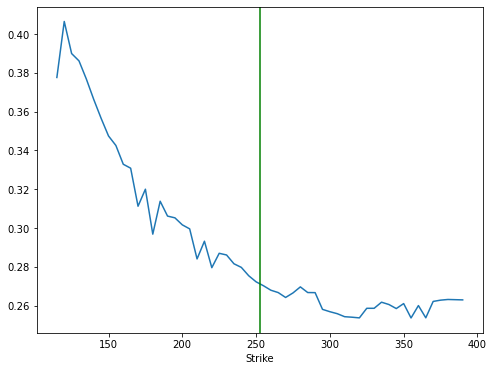

In [19]:
ax = put.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6)) # IV es implied volatility
ax.axvline(put.Underlying_Price.iloc[0], color='g'); # strike price del activo subyacente

In [20]:
opt_deseada = MSFT_opt.loc[(MSFT_opt.Type=='put') & (MSFT_opt.Strike==300) & (MSFT_opt.Expiry=='2023-06-16')]
opt_deseada

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,...,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
1479,300.0,2023-06-16,put,MSFT230616P00300000,67.1,65.5,68.85,...,MSFT,False,MSFT,252.46,2021-05-07 20:00:02,2021-05-07 14:52:01,"{'contractSymbol': 'MSFT230616P00300000', 'str..."


In [21]:
opt_valuar = opt_deseada.loc[list(opt_deseada.index)[0]]
opt_valuar

Strike                                                            300
Expiry                                            2023-06-16 00:00:00
Type                                                              put
Symbol                                            MSFT230616P00300000
Last                                                             67.1
Bid                                                              65.5
Ask                                                             68.85
Chg                                                             -4.12
PctChg                                                        -5.7849
Vol                                                                39
Open_Int                                                          537
IV                                                           0.256828
Root                                                             MSFT
IsNonstandard                                                   False
Underlying          

In [22]:
opt_valuar['JSON']

{'contractSymbol': 'MSFT230616P00300000',
 'strike': 300.0,
 'currency': 'USD',
 'lastPrice': 67.1,
 'change': -4.1200027,
 'percentChange': -5.7848954,
 'volume': 39,
 'openInterest': 537,
 'bid': 65.5,
 'ask': 68.85,
 'contractSize': 'REGULAR',
 'expiration': 1686873600,
 'lastTradeDate': 1620399121,
 'impliedVolatility': 0.2568281105041504,
 'inTheMoney': True}

In [23]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start = today, end = expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = 251

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())

In [24]:
K, S0

(300.0, 251)

In [25]:
pd.set_option('display.max_columns', 15)

# Precio barrera
B = 360

# Si en algún momento el precio toca la barrera la opción se desactiva
I = (sim_closes < B).cumprod(axis = 0) > 0
I

,0,1,2,3,4,5,6,...,9993,9994,9995,9996,9997,9998,9999
2021-05-07,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
2021-05-10,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
2021-05-11,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
2021-05-12,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
2021-05-13,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-12,False,False,True,True,False,False,False,...,True,False,True,False,False,True,False
2023-06-13,False,False,True,True,False,False,False,...,True,False,True,False,False,True,False
2023-06-14,False,False,True,True,False,False,False,...,True,False,True,False,False,True,False
2023-06-15,False,False,True,True,False,False,False,...,True,False,True,False,False,True,False


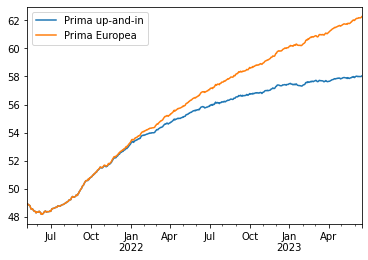

In [26]:
# Definir strike
strike = K
# Calcular la prima de una opción Europea
put = pd.DataFrame({'Prima Europea':np.exp(-r*ndays)*np.fmax(strike - sim_closes, 0)
                     .mean(axis=1)},index=dates)
# Calcular la prima de una opción barrera
putui = pd.DataFrame({'Prima up-and-in':np.exp(-r*ndays)*(I * np.fmax(strike - sim_closes, 0))
                       .mean(axis=1)},index=dates)
# Graficar el resultado de las dos primas previamente valuadas
ax = putui.plot();
put.plot(ax=ax);

In [27]:
put.iloc[-1]

Prima Europea    62.257897
Name: 2023-06-16 00:00:00, dtype: float64

In [28]:
putui.iloc[-1]

Prima up-and-in    58.035717
Name: 2023-06-16 00:00:00, dtype: float64

### CONCLUSION

En este caso tenemos una opción tipo put, tenemos la obligación de vender este activo al precio pactado. Si el precio llega a la barrera entonces no se ejerce la opción y no obtenemos nada, pero si no lo hace entonces tendríamos la ganancia del spot price del día. 

### LINK REPOSITORIO
[Link repositorio Github](https://github.com/danielperhez/Tarea11_CPerez)